<a href="https://colab.research.google.com/github/jorge-leiseca/Red-neuronal/blob/master/Construcci%C3%B3n_de_una_red_neuronal_completa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

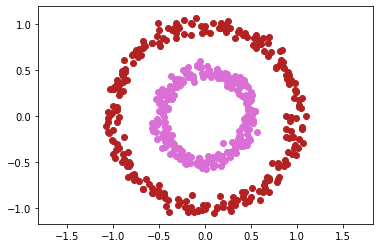

In [82]:
#Crear el dataset


#cantidad de datos
n= 500

#número de parámetros por dato, al ser solo dos podemos graficarlos en un plano x y
p = 2

#usamos la función make_circles para que genere el dataset de X Y , luego tengo tres parámetros
#n_samples el numero de datos que en nuestro caso es n es decir 500. lueo factor es la distancia que hay entre los dos circulos que se van a formar
#por ultimo noise es la cantidad de particulas en las que se convierte y se muestran los circulos
X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

#para evitar que nos haga una serie
Y = Y[:, np.newaxis]

#Aquí usamos la libreria que ya importamos como plt, para visualizar los circulos y eventuales particulas
#ponemos en el arreglo[] : que quiere decir todos los puntos y ponemos 0 que se refiere a la columna número 1 y luego ponemos en el siguiente arreglo[] : todos los puntos y la cordenada 2 que es representada por el 1
#plt.scatter(X[:, 0], X[:, 1], c="skyblue")

#también si en lugar de poner : para todos los números ponemos Y es igual a 0 entonces nos mostrará solo un circulo correspondientes a los valores de cero : el circulo grande y azul de afuera
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="firebrick")

#ponemos Y es igual a 1 entonces nos mostrará solo un circulo correspondientes a los valores de uno, el irculo rojo de adentro
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="Orchid")

#pedimos que la libreria nos visualice los puntos con la misma propori+on para organizar mejor el gráfico
plt.axis("equal")

#ahora invocamos la función de la libreria plt show para que nos muestrela gráfica que programamos
plt.show()

In [0]:
# CLASE DE LA CAPA DE LA RED
#La neurona es la únidad de procesamiento de una red neuronal
#podemos juntar muchas neuronas en diferentes capas para conseguir la codificación más compleja
#Sin embargo cada formula que usamos en nuestra red neuronal son posibles de VECTORIZAR
#Dentro de una capa estamos realizando las mismas formulas ya que están vectorizadas
#se puede pensar que cada capa es un modulo y que dentro de cada capa se realizan las mismas formulas y esta capa es el modulo principal

#CLASE DE LA CAPA DE LA RED/esto lo definimospara referirnos auna capa
class neural_layer():
 
  def __init__(self, n_conn, n_neur, act_f):
    #aquí soloponemos los parámetros de la capa w b Sin ningún tipode función para no complejizar la estructura
#self:   n_conn:número de conexiones, n_neur:número de neuronas, act_f: activation function que se ejecuta dentro de las neuronas de esta capa
    

 #lafunción de activación de la capa es igual al parámetro que pasamos anteriormente
    self.act_f = act_f


#vector que se refiere al parámetro de baya y tendremos tantos como número de neuronas tengamos en la capa. En este caso los parámetro de la red se inicializan de manera aleatoria
    #usamos np.random.rand para inicializar de manera aleatoria y la funcion. Especificamos que para el bayas queremos que sea vector columna (1, n_neur) en este caso el random nos devuelve valores entre 0 a 1 
    #ya que queremos que los números del random sean entre -1 a 1 entonces multiplicamos por 2 y le restamos 1 *2 -1
    self.b = np.random.rand(1, n_neur)      * 2 - 1

    #Hacemos lo mismo pero con la matriz w con el número de conexiones y número de neuronas
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1

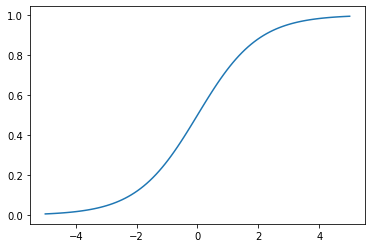

In [98]:
#FUNCION DE ACTIVACIÓN
#Recordemos que las funciones de activación nos permite la combinación de diversas neuronas sin que estas colapsen en una linea recta

#función de activación sigmoide. Coolocamos una variable como sigm y la ejecutamos como una función anonima con lambda x. Luego escribimos la formula de la sigmoide
#recordemos que esta función toma el número de entrada y lo distorciona entre los valores -1 a 1
sigm = (lambda x: 1 /(1 + np.e **(-x)),
        lambda x: x * (1 - x)) #esto lo hacemos para acceder a la derivada de la función sigmoide

relu = lambda x: np.maximum(0, x)


#definimos variable X que sea linspace y creamos una variable que vaya de -5 a 5 y genere 100 valores. Esto es un vector de 100 valores que van de -5 a 5
_x = np.linspace(-5, 5,100)

#Ahora le pido que haga un plot o grafico donde en el eje X pone la variable que creamos "_X" y en el eje Y pone el resultado de pasar por la función sigmoide a _X
plt.plot(_x, sigm[0](_x)) #si pongo 0 accedo a la función sigmoide y si pongo 1 accedo a la derivada. Intente visualizar ambas.


#Aquí también se puede hacer con una función de activación RELU
#plt.plot(_x, relu(_x))

In [0]:
# CREAMOS LA RED NEURONAL
#creamos l0 como layer o capa0 , invocamos la función neural layer para crear una capa
#p es la variable del comienzo que define el número de entrada dela neurona(en este caso es 2)
#le damos 4 neuronas y una función de activación sigmoide
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
#podríamos seguir así una a una con cada capa sin embargo podemos hacerlo de otra manera


#a esta función que definimos le pasamos el vector topology y la función de activación
def create_nn(topology, act_f):
  
  #en este vector contenemos todas las capas de la red neuronal
  nn = []
  

  #definimos un bucle for con la función enumerate que nos da el indice del vector que recorremos y el objeto(es decir los números dentro de topology)
  for l, layer in enumerate(topology[:-1]):
    
   #dentro de este vector añadimos una neural_layer cuya primera capa coontiene el número de conexiones de topology en la posición l ya que l es lo que recorreremos durante todo bucle for
   #Vamos a tener tantas neuronas que hayan marcado l + 1 y la función de activación será la que definimos con atc_f
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
    
  return nn

 

PARA ESTE MOMENTO TENEMOS LA ESTRUCTURA DE UNA RED NEURONAL COMPLETA

In [80]:
# FUNCION DE ENTRENAMIENTO

topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)  

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))



def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
  
  out = [(None, X)]
  
  # Forward pass
  for l, layer in enumerate(neural_net):
  
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)
  
    out.append((z, a))
    
  
  if train:
    
    # Backward pass 
    deltas = []
    
    for l in reversed(range(0, len(neural_net))):
      
      z = out[l+1][0]
      a = out[l+1][1]
      
      if l == len(neural_net) - 1:
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
       
      _W = neural_net[l].W
 
      # Decenso del gradiente
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
      
  return out[-1][1]
  
  
train(neural_net, X, Y, l2_cost, 0.5)
print("")

  

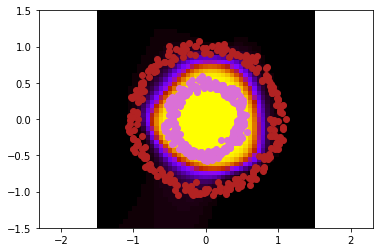

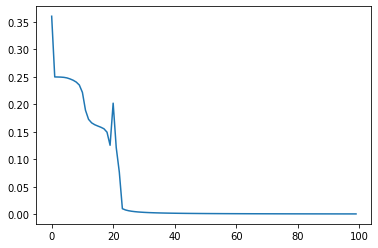

In [99]:
# Códiigo para visualizar el entrenamiento y el progreso

import time
from IPython.display import clear_output

#creamos una red neuronal nueva con una topologia diferente y la función sigmoide
neural_n = create_nn(topology, sigm)

#creamos un vector vacio donde guardar todos los valores de función de coste o error para así poder ir graficando la evolución de este
loss = []

#iteramos muchas eces el for mientras llamamos la función train que habiamos hecho con anterioridad
for i in range(2500):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  
  #cada 25 iteraciones calculamos el coste y lo añadimos a nuestro vector
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(l2_cost[0](pY, Y))
  
  #malla de 50 x 50 y en cada punto vamos hacer una predicción
  #visualizaremos en rojo y azul cada lectura
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="gnuplot")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="firebrick")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="Orchid")


#con esto borramos el contenido y dibujamos el siguiente para que se vea de forma animada
    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5) 